In [176]:
import pandas as pd
import emoji
import math
import re
from datetime import datetime, timezone

import matplotlib as plt
import seaborn as sns

In [147]:
# UTILS FUNCTIONS

def remove_emojis(text):
    if not isinstance(text, str) : return ''
    return emoji.replace_emoji(text, replace='')

def extract_topics(link_list):
    links = link_list.split(',')
    topics = []
    for link in links:
        topic = link.split('/')[-1]
        topics.append(topic)
    return ', '.join(topics)


def duration_to_seconds(duration_str):
    """
    Convert an ISO 8601 duration string to seconds.
    
    Examples:
    - PT1M32S -> 92 seconds (1 minute, 32 seconds)
    - PT1H2M3S -> 3723 seconds (1 hour, 2 minutes, 3 seconds)
    - P1DT2H3M4S -> 93784 seconds (1 day, 2 hours, 3 minutes, 4 seconds)
    
    Args:
        duration_str (str): ISO 8601 duration string
        
    Returns:
        int: Total duration in seconds
    """
    # Normalize the string (make it case insensitive)
    duration_str = duration_str.upper()
    
    # Initialize total seconds
    total_seconds = 0
    
    # Extract days if present
    day_match = re.search(r'P(\d+)D', duration_str)
    if day_match:
        days = int(day_match.group(1))
        total_seconds += days * 24 * 60 * 60
    
    # Extract hours, minutes, and seconds
    hour_match = re.search(r'T.*?(\d+)H', duration_str)
    if hour_match:
        hours = int(hour_match.group(1))
        total_seconds += hours * 60 * 60
    
    minute_match = re.search(r'T.*?(\d+)M', duration_str)
    if minute_match:
        minutes = int(minute_match.group(1))
        total_seconds += minutes * 60
    
    second_match = re.search(r'T.*?(\d+)S', duration_str)
    if second_match:
        seconds = int(second_match.group(1))
        total_seconds += seconds
    
    return total_seconds


def days_ago(date_string):
    """
    Calculate how many days ago a date was from today.
    
    Args:
        date_string (str): ISO format date string (e.g., '2025-03-30T16:41:32Z')
        
    Returns:
        int: Number of days between the input date and today (0 if same day)
    """
    # Parse the input date string to a datetime object
    input_date = datetime.fromisoformat(date_string.replace('Z', '+00:00'))
    
    # Get current date and time in UTC
    today = datetime.now(timezone.utc)
    
    # Calculate the difference in days
    delta = today - input_date
    
    # Return the number of days
    return delta.days


In [101]:
df = pd.read_csv('~/UTK /Spring 25/DATA 304/Final Project/data/videos/korean vlog.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   video_id        10 non-null     object
 1   published_at    10 non-null     object
 2   channel_id      10 non-null     object
 3   title           10 non-null     object
 4   description     8 non-null      object
 5   channel_title   10 non-null     object
 6   tags            6 non-null      object
 7   category_id     10 non-null     int64 
 8   view_count      10 non-null     int64 
 9   like_count      10 non-null     int64 
 10  favorite_count  10 non-null     int64 
 11  comment_count   10 non-null     int64 
 12  duration        10 non-null     object
 13  topic           10 non-null     object
dtypes: int64(5), object(9)
memory usage: 1.2+ KB


## 1. Data Wrangling

In [153]:
# remove emojis from title & description
df['title'] = df['title'].apply(remove_emojis)
df['description'] = df['description'].apply(remove_emojis)

In [155]:
# extract topics from links
df['topic'] = df['topic'].apply(extract_topics)

In [157]:
# convert duration string to duration in seconds
df['duration(sec)'] = df['duration'].apply(duration_to_seconds)

In [159]:
# convert publish_at from iso date string to distance from today
df['published_Xdays_ago'] = df['published_at'].apply(days_ago) 

In [161]:
df.head(2)

,video_id,published_at,channel_id,title,description,channel_title,tags,category_id,view_count,like_count,favorite_count,comment_count,duration,topic,duration(sec),published,published_Xdays_ago
0,dMzBo6LT3bM,2024-08-30T16:41:32Z,UCyG7zAV_2JlPnxhwDxZN6sA,vlog | 집순이 새댁의 삼시세끼 야식으로 라면 매콤한 해물찜과 날치알 주먹밥...,#브이로그 #주부브이로그 #도시락 #신혼부부 #집밥 #koreanfood #집밥브이...,지현꿍,NaN,22,732323,14265,0,315,PT20M27S,"Food, Lifestyle_(sociology)",1227,213,213
1,LX7VtxMCAVM,2024-12-24T12:00:34Z,UC_PH4L_uvMdYElAtU7a7HjA,"KOREA VLOG: winter in seoul, cute miffy cafe, ...",Get an exclusive 15% discount on Saily data pl...,saranghoe,NaN,22,403939,21092,0,452,PT13M50S,Lifestyle_(sociology),830,97,97


### Next step: analyzing
- most common tags / topic
- view-like / duration-view / view-comment ratio & correlation
- category listed
- average view
- avg view per day

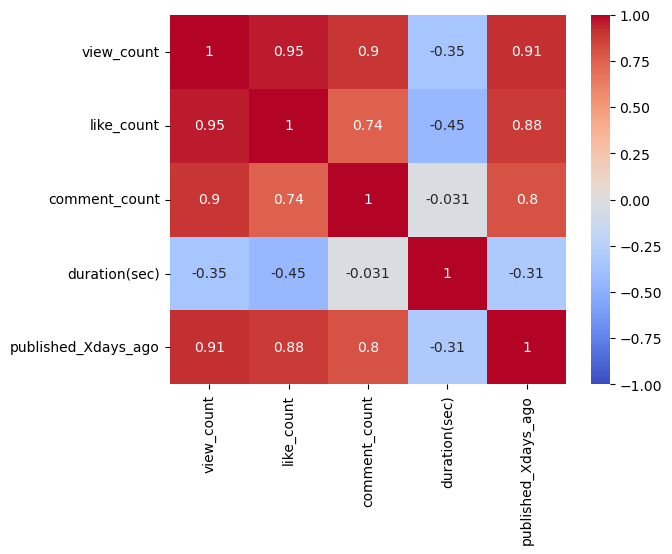

In [186]:
cols = ['view_count', 'like_count', 'comment_count', 'duration(sec)', 'published_Xdays_ago']
corr_matrix = df[cols].corr()
sns.heatmap(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1, annot=True );

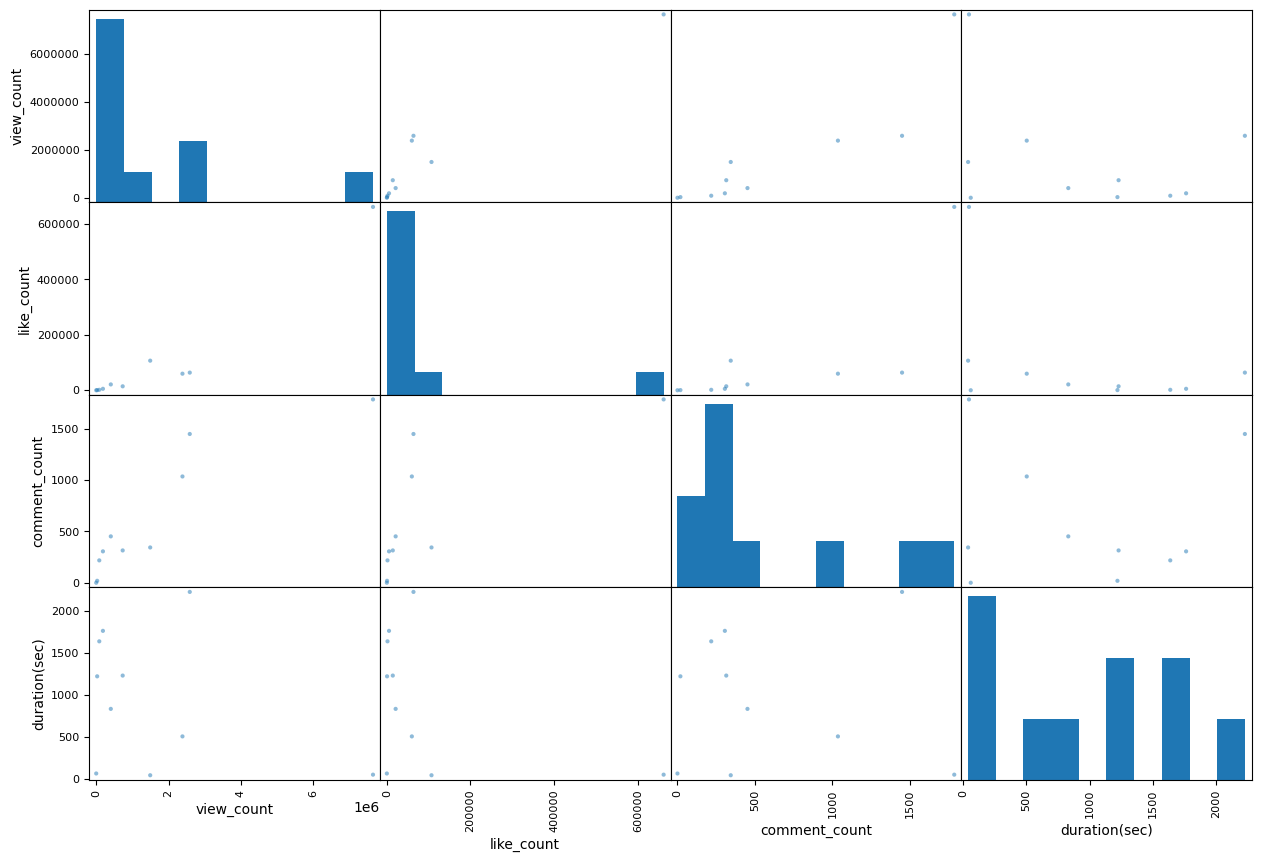

In [188]:
pd.plotting.scatter_matrix(df[cols[:-1]], figsize=(15,10));